In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.datasets import load_iris
import sklearn.metrics as mx
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = load_iris()
X = df.data
y = df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [4]:
dt = DecisionTreeClassifier()
"""
Params: 

#Criterian : gini, entropy
#max_depth : Max depth of tree
# min_samples_split : The minimum number of samples required to split an internal node
# splitter: best/random ... best ----> take all features and select best one to split, 
                            random --> take random subset of features and select best out of them
# min_samples_leaf : The minimum number of samples required to be at a leaf node.
# max_features : The number of features to consider when looking for the best split
# min_weight_fraction_leaf : The minimum weighted fraction of the sum total of weights 
                             (of all the input samples) required to be at a leaf node.
# max_leaf_nodes : Best nodes are defined as relative reduction in impurity
# min_impurity_decrease : A node will be split if this split induces a decrease of the impurity greater than or equal to this value
"""

In [5]:
hyper_params = [{
    'criterion': ['gini','entropy'],
    'splitter':['best','random']              
}]
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator=dt,
                       param_grid = hyper_params,
                       scoring ='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=12)
model_cv.fit(X_train,y_train)
'''
By default joblib.Parallel uses the 'loky' backend module to start separate Python worker processes to execute tasks 
concurrently on separate CPUs. This is a reasonable default for generic Python programs but can induce a significant 
overhead as the input and output data need to be serialized in a queue for communication with the worker processes 
'''

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:   39.2s remaining:    4.3s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:   39.2s finished


"\nBy default joblib.Parallel uses the 'loky' backend module to start separate Python worker processes to execute tasks \nconcurrently on separate CPUs. This is a reasonable default for generic Python programs but can induce a significant \noverhead as the input and output data need to be serialized in a queue for communication with the worker processes \n"

In [6]:
print(model_cv.best_score_)
print(model_cv.best_params_)
print(model_cv.best_estimator_)

0.9047619047619048
{'criterion': 'gini', 'splitter': 'best'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [7]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
print(dt.max_features_) #value of max_featuresfrom dt object
print(dt.feature_importances_)
print(dt.classes_)
print(dt.n_classes_)
print(dt.n_features_)  # featuresfrom a dataset
print(dt.n_outputs_) # output will be only 1 class
print(dt.tree_) # tree object address

4
[0.03822004 0.         0.53816374 0.42361622]
[0 1 2]
3
4
1


In [13]:
print(dt.get_params())
print(dt.score(X_train,y_train))
print(dt.get_n_leaves())
print(dt.get_depth())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
1.0
9
5


In [15]:
print(dt.predict(X_test))
print(dt.predict_proba(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [23]:
X_train[1]

array([6.3, 2.8, 5.1, 1.5])

In [43]:
a = dt.decision_path(X_train[1].reshape(1,4))
a.todense()

matrix([[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [28]:
# Printing a Decision Tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import  pydotplus,graphviz


In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Garg/anaconda3/Library/bin/graphviz/'

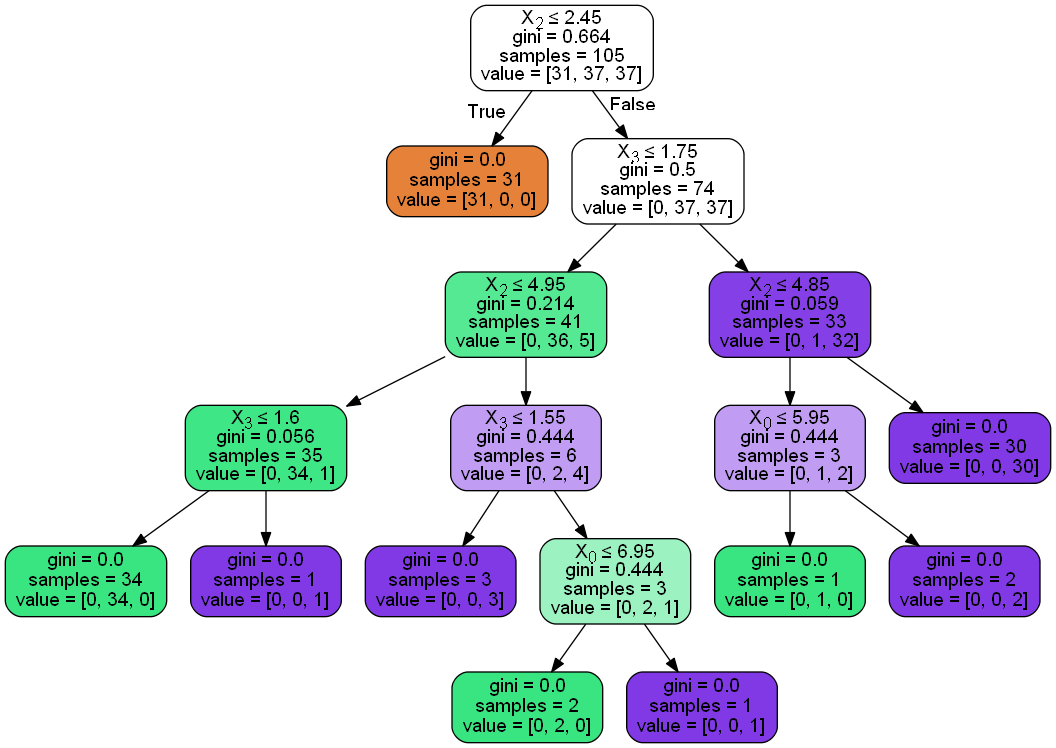

In [36]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
# How this could be interpreted
'''
1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0

If row wise we give the numbers as 1-17
then
1,2,3,4,6,10,11,7,12,13,16,17,5,8,14,15,9

Traverse To a Node ---> Traverse Leftand then right, completethe left trees with zero if not matching then 
                        go to right
'''